#Mega Case Study - Making a hybrid Deep Learning Model

#Part 1 - SOM

##Install MiniSom Package

In [1]:
!pip install MiniSom

## Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [5]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


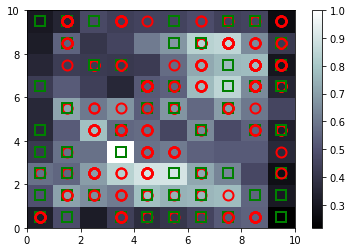

In [6]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [15]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(6,8)], mappings[(4,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [16]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15767358
15567839
15642336
15740487
15593345
15811742
15622083
15646190
15715907
15768342
15748532
15689692
15672357
15682540
15800773
15701687
15630592


#Part 2 - Going from Unsupervised to Supervised Deep Learning

##Create Matrix of Features

In [21]:
customers = dataset.iloc[:, 1:].values

## Create Dependent Variable

In [22]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

#Part 3 - ANN

### Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

##Import Tensorflow

In [24]:
import tensorflow as tf
tf.__version__

'2.4.1'

## Initializing the ANN

In [25]:
ann = tf.keras.models.Sequential()

##Adding the input layer and the first hidden layer

In [26]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

## Adding the output layer

In [27]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

## Compiling the ANN

In [28]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the ANN on the Training set

In [29]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 1s 512us/step - loss: 1.0385 - accuracy: 0.3764
Epoch 2/10
690/690 [==============================] - 0s 515us/step - loss: 0.5157 - accuracy: 0.8651
Epoch 3/10
690/690 [==============================] - 0s 511us/step - loss: 0.3403 - accuracy: 0.9551
Epoch 4/10
690/690 [==============================] - 0s 509us/step - loss: 0.2367 - accuracy: 0.9781
Epoch 5/10
690/690 [==============================] - 0s 504us/step - loss: 0.1963 - accuracy: 0.9745
Epoch 6/10
690/690 [==============================] - 0s 509us/step - loss: 0.1741 - accuracy: 0.9700
Epoch 7/10
690/690 [==============================] - 0s 497us/step - loss: 0.1335 - accuracy: 0.9800
Epoch 8/10
690/690 [==============================] - 0s 495us/step - loss: 0.1302 - accuracy: 0.9740
Epoch 9/10
690/690 [==============================] - 0s 503us/step - loss: 0.1410 - accuracy: 0.9662
Epoch 10/10
690/690 [==============================] - 0s 501us/step - loss: 0.089

## Predicting test set results

In [30]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

In [31]:
print(y_pred)

[[1.57761560e+07 4.59966063e-02]
 [1.57053790e+07 4.59966063e-02]
 [1.57545780e+07 4.59966063e-02]
 ...
 [1.57404870e+07 3.61651272e-01]
 [1.57673580e+07 3.69393826e-01]
 [1.56423360e+07 4.46583390e-01]]
